## Download do dataset

Coloque seu Kaggle API Token (arquivo `kaggle.json`) no sistema de Arquivos do Colab.

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
kagglehub.competition_download('aptos2019-blindness-detection')

100%|██████████| 9.51G/9.51G [05:19<00:00, 32.0MB/s]

Extracting files...


'/root/.cache/kagglehub/competitions/aptos2019-blindness-detection'

## Preparando para manipular o dataset

In [13]:

!pip uninstall -y keras
!pip install --upgrade tensorflow



Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all


STARTING FINE-TUNING RUN WITH SEED: 564258
Loading base model from: best_model_seed_564258.keras

Building training dataset...
Caching images in RAM for this run...


Caching training images: 100%|██████████| 2929/2929 [03:04<00:00, 15.89it/s]


Training dataset is ready!

Building validation dataset...
Validation dataset is ready!

Loading model from best_model_seed_564258.keras...
Fine-tuning will start from layer: 'Conv_1' (index 151).

Model summary after unfreezing layers:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 418,565 (1.60 MB)

 Non-trainable params: 1,845,824 (7.04 MB)


--- Starting fine-tuning for seed 564258 ---
Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6519 - loss: 0.9925 - val_accuracy: 0.7667 - val_loss: 0.6816
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 384ms/step - accuracy: 0.6957 - loss: 0.8304 - val_accuracy: 0.7558 - val_loss: 0.7012
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 385ms/step - accuracy: 0.7451 - loss: 0.7144 - val_accuracy: 0.7462 - val_loss: 0.7178
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 390ms/step - accuracy: 0.7713 - loss: 0.6561 - val_accuracy: 0.7462 - val_loss: 0.7404
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 398ms/step - accuracy: 0.7587 - loss: 0.6782 - val_accuracy: 0.7381 - val_loss: 0.7491
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 394ms/step - accuracy: 0.7594 - loss: 0.6421 - val_accuracy: 0.7353 - val_loss: 0.7533
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 395ms/step - accuracy: 0.7661 - loss: 0.6440 - val_accuracy: 0.7367 - val_loss: 0.7480
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 396

Caching training images: 100%|██████████| 2929/2929 [03:21<00:00, 14.50it/s]


Training dataset is ready!

Building validation dataset...
Validation dataset is ready!

Loading model from best_model_seed_564307.keras...
Fine-tuning will start from layer: 'Conv_1' (index 151).

Model summary after unfreezing layers:


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 418,565 (1.60 MB)

 Non-trainable params: 1,845,824 (7.04 MB)


--- Starting fine-tuning for seed 564307 ---
Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 102s 991ms/step - accuracy: 0.6208 - loss: 1.1601 - val_accuracy: 0.7572 - val_loss: 0.6665
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 396ms/step - accuracy: 0.6811 - loss: 0.8655 - val_accuracy: 0.7585 - val_loss: 0.7093
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 398ms/step - accuracy: 0.7414 - loss: 0.7433 - val_accuracy: 0.7503 - val_loss: 0.7397
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 394ms/step - accuracy: 0.7377 - loss: 0.7393 - val_accuracy: 0.7462 - val_loss: 0.7612
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 382ms/step - accuracy: 0.7496 - loss: 0.6967 - val_accuracy: 0.7367 - val_loss: 0.7717
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 389ms/step - accuracy: 0.7507 - loss: 0.7198 - val_accuracy: 0.7381 - val_loss: 0.7771
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 386ms/step - accuracy: 0.7471 - loss: 0.7276 - val_accuracy: 0.7435 - val_loss: 0.7606
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 

Caching training images: 100%|██████████| 2929/2929 [03:21<00:00, 14.51it/s]


Training dataset is ready!

Building validation dataset...
Validation dataset is ready!

Loading model from best_model_seed_564322.keras...
Fine-tuning will start from layer: 'Conv_1' (index 151).

Model summary after unfreezing layers:


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 418,565 (1.60 MB)

 Non-trainable params: 1,845,824 (7.04 MB)


--- Starting fine-tuning for seed 564322 ---
Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 102s 988ms/step - accuracy: 0.6544 - loss: 0.9987 - val_accuracy: 0.7394 - val_loss: 0.6987
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 390ms/step - accuracy: 0.7135 - loss: 0.8000 - val_accuracy: 0.7408 - val_loss: 0.7334
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 398ms/step - accuracy: 0.7638 - loss: 0.6797 - val_accuracy: 0.7285 - val_loss: 0.7746
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 0.7474 - loss: 0.7323 - val_accuracy: 0.7217 - val_loss: 0.7804
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 395ms/step - accuracy: 0.7673 - loss: 0.6891 - val_accuracy: 0.7149 - val_loss: 0.7969
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 394ms/step - accuracy: 0.7556 - loss: 0.6825 - val_accuracy: 0.7108 - val_loss: 0.8095
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 392ms/step - accuracy: 0.7639 - loss: 0.6923 - val_accuracy: 0.7040 - val_loss: 0.8129
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 

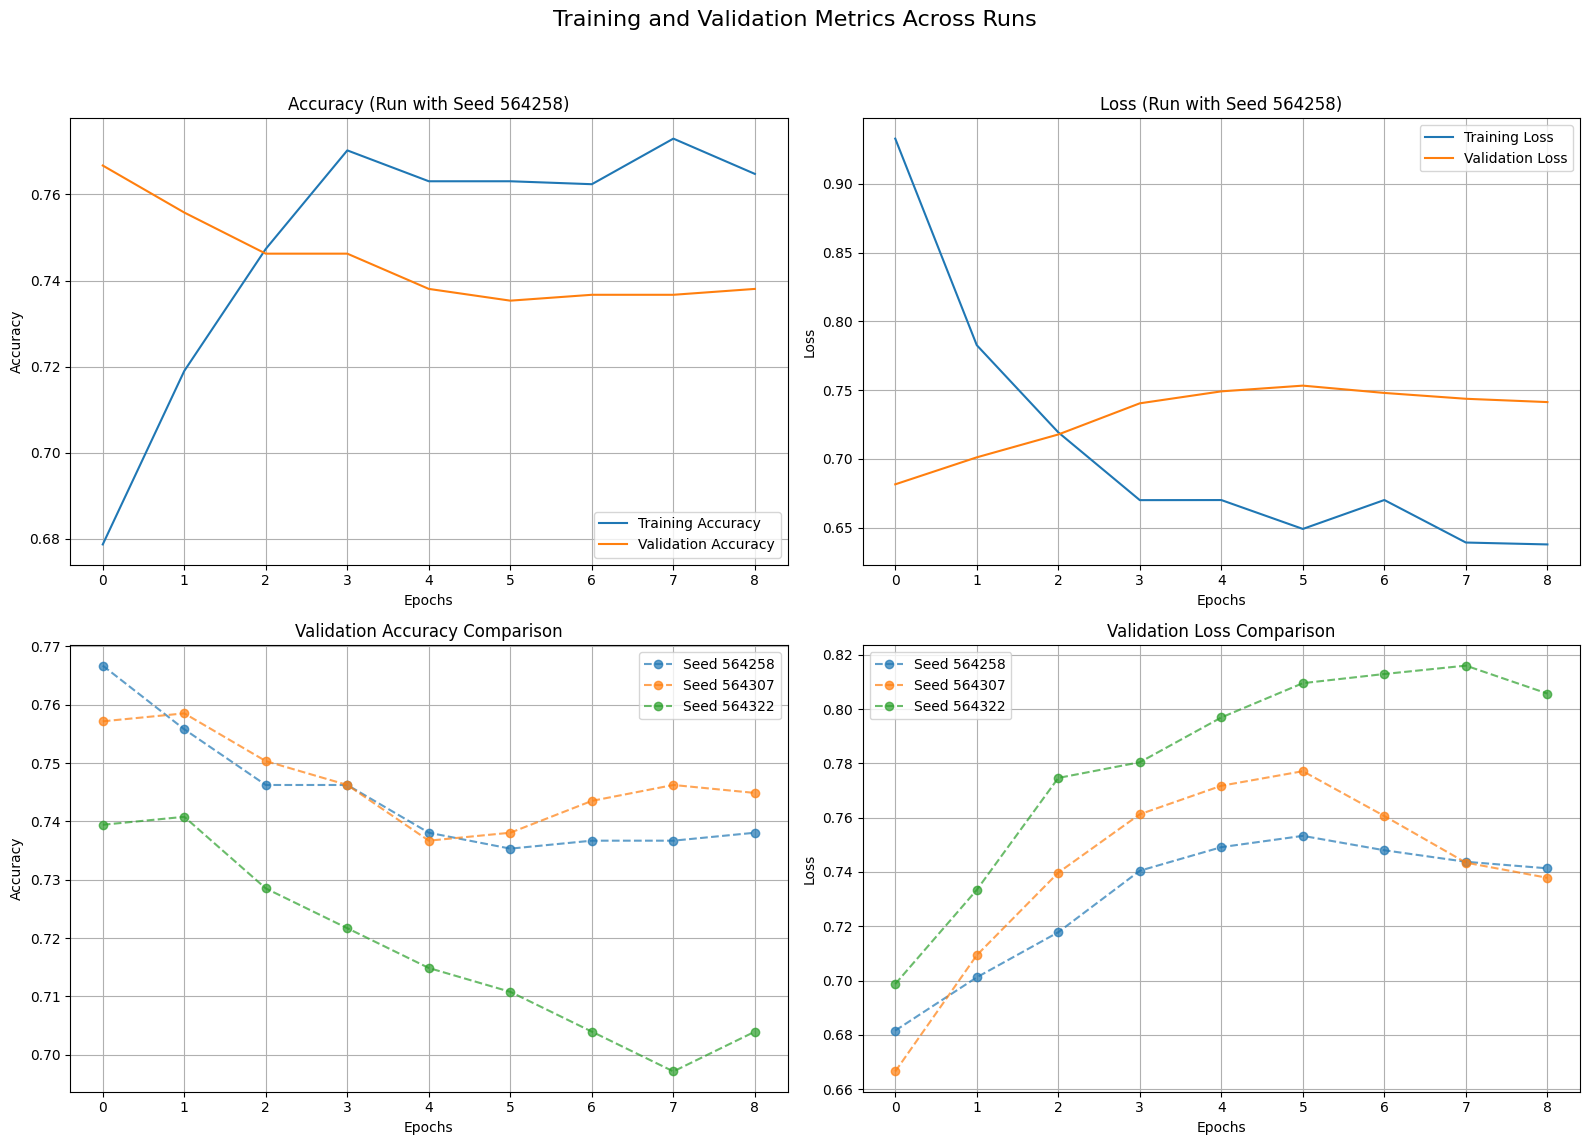

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, cohen_kappa_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random

# File paths
BASEDIR = '/root/.cache/kagglehub/competitions/aptos2019-blindness-detection'
TRAINDIR = f'{BASEDIR}/train_images'
TESTDIR = f'{BASEDIR}/test_images'

# Train labels
train_label_df = pd.read_csv(f'{BASEDIR}/train.csv')
train_label_df = train_label_df.set_index('id_code')
train_label_df.head()

# Global Parameters
IMG_SIZE = 224
BATCH_SIZE = 32
FINETUNING_LEARNING_RATE = 1e-5
NUM_EPOCHS = 100
PATIENCE = 8
SEEDS = [564258, 564307, 564322]
NUM_CLASSES = 5

# Experiment function
def run_fine_tuning(seed, pretrained_model_path):
    """
    Loads a pre-trained model and performs fine-tuning.

    Args:
        seed (int): The random seed for reproducibility.
        pretrained_model_path (str): The file path to the .keras model from Phase 1.
    """
    if not os.path.exists(pretrained_model_path):
        print(f"Error: Pre-trained model not found at {pretrained_model_path}")
        return

    print(f"\n{'='*60}")
    print(f"STARTING FINE-TUNING RUN WITH SEED: {seed}")
    print(f"Loading base model from: {pretrained_model_path}")
    print(f"{'='*60}")

    # --- Setup for reproducibility ---
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    AUTOTUNE = tf.data.AUTOTUNE

    data_augmentation = keras.models.Sequential([
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation(0.2),
        keras.layers.RandomZoom(height_factor=(-0.1, 0.1)),
        keras.layers.RandomBrightness(factor=0.2),
        keras.layers.RandomContrast(factor=0.2)
    ], name="data_augmentation")

    # Apply seed to augmentation layers as well
    for layer in data_augmentation.layers:
        if hasattr(layer, 'seed'):
            layer.seed = seed

    # --- Train/validation split ---
    image_paths = train_label_df.index.map(lambda x: f"{TRAINDIR}/{x}.png").to_list()
    diagnostics = train_label_df['diagnosis'].to_list()
    train_paths, val_paths, train_labels, val_labels = train_test_split(
        image_paths, diagnostics, test_size=0.2, random_state=seed, stratify=diagnostics
    )

    # --- Data preparation pipeline ---
    def load_and_preprocess_image(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
        return img, label

    def augment_and_normalize(image, label):
        image = data_augmentation(image, training=True)
        image = image / 255.0
        return image, label

    print("\nBuilding training dataset...")
    train_ds_initial = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
    train_ds_mapped = train_ds_initial.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

    print("Caching images in RAM for this run...")
    train_images_cached = []
    train_labels_cached = []
    for image, label in tqdm(train_ds_mapped, total=len(train_paths), desc="Caching training images"):
        train_images_cached.append(image.numpy())
        train_labels_cached.append(label.numpy())

    train_ds = tf.data.Dataset.from_tensor_slices((np.array(train_images_cached), np.array(train_labels_cached)))
    train_ds = train_ds.shuffle(len(train_paths), seed=seed).map(augment_and_normalize, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
    print("Training dataset is ready!")

    print("\nBuilding validation dataset...")
    validation_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
    validation_ds = validation_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE).map(lambda img, lbl: (img / 255.0, lbl)).cache().batch(BATCH_SIZE).prefetch(AUTOTUNE)
    print("Validation dataset is ready!")

    # --- Load & Modify the Model ---
    print(f"\nLoading model from {pretrained_model_path}...")
    model = keras.models.load_model(pretrained_model_path)

    # 1. First, set the entire model to be trainable.
    # The loaded model has most layers frozen, so we unfreeze everything first.
    for layer in model.layers:
        layer.trainable = True

    # 2. Find the layer from which to start fine-tuning.
    fine_tune_from_layer = 'Conv_1'
    freeze_until_index = None

    # Iterate directly over the loaded model's layers.
    for i, layer in enumerate(model.layers):
        if layer.name == fine_tune_from_layer:
            freeze_until_index = i
            break

    if freeze_until_index is None:
        raise ValueError(f"Layer '{fine_tune_from_layer}' not found in the model.")

    # 3. Now, re-freeze all the layers before the target layer.
    for layer in model.layers[:freeze_until_index]:
        layer.trainable = False

    print(f"Fine-tuning will start from layer: '{fine_tune_from_layer}' (index {freeze_until_index}).")

    # --- Compile & Train ---
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=FINETUNING_LEARNING_RATE),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\nModel summary after unfreezing layers:")
    model.summary()

    # Callbacks for fine-tuning
    finetuned_checkpoint_path = f'best_finetuned_model_seed_{seed}.keras'
    ft_early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True, verbose=1)
    ft_model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath=finetuned_checkpoint_path, save_best_only=True, monitor='val_loss', mode='min'
    )

    print(f"\n--- Starting fine-tuning for seed {seed} ---")
    history_finetune = model.fit(
        train_ds,
        epochs=NUM_EPOCHS,
        validation_data=validation_ds,
        callbacks=[ft_early_stopping, ft_model_checkpoint],
        verbose=1
    )

    # --- Evaluation ---
    print(f"\n--- Evaluating best fine-tuned model for seed {seed} from {finetuned_checkpoint_path} ---")
    best_model = keras.models.load_model(finetuned_checkpoint_path)

    print("Generating predictions on the validation set...")
    raw_predictions = best_model.predict(validation_ds)
    y_pred = np.argmax(raw_predictions, axis=1)
    y_true = np.concatenate([y for x, y in validation_ds], axis=0)

    # Calculate metrics
    kappa = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    final_scores = best_model.evaluate(validation_ds, verbose=0)

    print(f"\nFinal Fine-Tuning Results for Seed {seed}:")
    print(f"  - Validation Loss: {final_scores[0]:.4f}")
    print(f"  - Validation Accuracy: {final_scores[1]:.4f}")
    print(f"  - Quadratic Weighted Kappa: {kappa:.4f}")
    print(f"  - Weighted F1-Score: {f1_score:.4f}")
    print(f"  - Weighted Precision: {precision:.4f}")
    print(f"  - Weighted Recall: {recall:.4f}")

    return {
        'seed': seed,
        'history': history_finetune.history,
        'val_loss': final_scores[0],
        'val_accuracy': final_scores[1],
        'kappa': kappa,
        'f1_score': f1_score,
        'precision': precision,
        'recall': recall,
        'full_report': report
    }


all_results = []
for seed_value in SEEDS:
    path = f'best_model_seed_{seed_value}.keras'
    result = run_fine_tuning(seed_value, path)
    all_results.append(result)

print(f"\n{'='*60}")
print("FINAL RESULTS ACROSS ALL RUNS")
print(f"{'='*60}")
print("Parameters used:")
print(f"  - Finetuning Learning Rate: {FINETUNING_LEARNING_RATE}")
print(f"  - Epochs: Up to {NUM_EPOCHS} (with Early Stopping patience={PATIENCE})")
print(f"  - Batch Size: {BATCH_SIZE}")
print(f"  - Seeds: {SEEDS}")

results_df = pd.DataFrame(all_results)
metric_columns = ['seed', 'val_loss', 'val_accuracy', 'kappa', 'f1_score', 'precision', 'recall']
print("\n--- Per-run Metrics ---")
print(results_df[metric_columns].round(4))

print("\n--- Summary Statistics (Média e Desvio-Padrão) ---")
summary_cols = ['val_loss', 'val_accuracy', 'kappa', 'f1_score', 'precision', 'recall']
summary = results_df[summary_cols].agg(['mean', 'std'])
print(summary.round(4))


# Gráficos de acurácia e loss
print("\n== Generating Plots ==")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Training and Validation Metrics Across Runs', fontsize=16)

# Plot Training & Validation Accuracy for one representative run (e.g., the first one)
axes[0, 0].plot(all_results[0]['history']['accuracy'], label='Training Accuracy')
axes[0, 0].plot(all_results[0]['history']['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_title(f'Accuracy (Run with Seed {all_results[0]["seed"]})')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot Training & Validation Loss for one representative run
axes[0, 1].plot(all_results[0]['history']['loss'], label='Training Loss')
axes[0, 1].plot(all_results[0]['history']['val_loss'], label='Validation Loss')
axes[0, 1].set_title(f'Loss (Run with Seed {all_results[0]["seed"]})')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot Validation Accuracy across all runs to show stability
for result in all_results:
    axes[1, 0].plot(result['history']['val_accuracy'], 'o--', alpha=0.7, label=f"Seed {result['seed']}")
axes[1, 0].set_title('Validation Accuracy Comparison')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot Validation Loss across all runs to show stability
for result in all_results:
    axes[1, 1].plot(result['history']['val_loss'], 'o--', alpha=0.7, label=f"Seed {result['seed']}")
axes[1, 1].set_title('Validation Loss Comparison')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()